In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadPic_toArray(file):
    _img = Image.open(file)
#     _img = _img.convert('L')
    img = np.array(_img)
    print(_img.mode)
    return img 

In [3]:
def RGB_toGray(pic):
    d = [0.299,0.587,0.114,0]
    d = np.array(d)
    _pic = np.zeros((pic.shape[0],pic.shape[1]))
    for i in range(_pic.shape[0]):
        for j in range(_pic.shape[1]):
            _pic[i][j] = pic[i][j].dot(d.T)
    return _pic

In [4]:
def resize(new_size,pic):
    '''
    -new_size:新的大小，tuple
    -pic:原图像矩阵，narray，灰度值
    '''
    new_pic = np.zeros((new_size))
    dict_x = [0,0,0,0]#对应位置周围的四个点，分别中左上，左下，右上，右下
    dict_y = [0,0,0,0]

    for x in range(new_size[0]):
        for y in range(new_size[1]):
            c_x = (x)*(pic.shape[0]-1)/(new_size[0]-1)
            c_y = (y)*(pic.shape[1]-1)/(new_size[1]-1)
            int_x = int(c_x)
            int_y = int(c_y)
            d_x = c_x-int_x
            d_y = c_y-int_y
            #如果在四个点的内部，要双线性
            if d_x!=0 and d_y!=0:
                _x = int(c_x)
                _y = int(c_y)
                dict_x[0] = _x
                dict_x[1] = _x
                dict_x[2] = _x+1
                dict_x[3] = _x+1
                dict_y[0] = _y
                dict_y[1] = _y+1
                dict_y[2] = _y
                dict_y[3] = _y+1
#                 print(dict_x[2],dict_y[2])
                gray_1 = (pic[dict_x[2],dict_y[2]]-pic[dict_x[0],dict_y[0]])*(c_x-dict_x[0])/(dict_x[2]-dict_x[0]) \
                        +pic[dict_x[0],dict_y[0]]
                gray_2 = (pic[dict_x[3],dict_y[3]]-pic[dict_x[1],dict_y[1]])*(c_x-dict_x[1])/(dict_x[3]-dict_x[1]) \
                        +pic[dict_x[1],dict_y[1]]
                new_pic[x][y] = int((gray_2-gray_1)*(c_y-dict_y[0])/(dict_y[1]-dict_y[0])+gray_1)
            #如果只有x坐标不是整数，只要做一次一维插值
            elif d_x!=0:
                new_pic[x][y] = (pic[int_x+1][int_y]-pic[int_x][int_y])*(c_x-int_x)+pic[int_x][int_y]
            elif d_y!=0:
                new_pic[x][y] = (pic[int_x][int_y+1]-pic[int_x][int_y])*(c_y-int_y)+pic[int_x][int_y]
            else:
                new_pic[x][y] = pic[int_x][int_y]
    return new_pic

(400, 600)


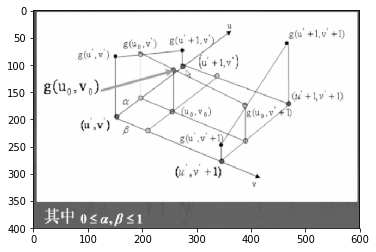

In [94]:
new_pic = resize((400,600),_pic)

plt.imshow(new_pic,cmap='Greys_r')
print(new_pic.shape)

RGBA
(345, 548)


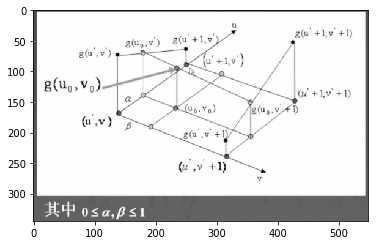

In [5]:
pic = loadPic_toArray('try.PNG')
# print(pic.shape)
# plt.imshow(pic,cmap='Greys_r')
_pic = RGB_toGray(pic)

plt.imshow(_pic,cmap='Greys_r')
print(_pic.shape)